# _`automaton`_.`is_equivalent`(_`aut`_)

Whether this automaton is equivalent to _`aut`_, i.e., whether they accept the same words with the same weights.

Preconditions:
- The join of the weightsets is either $\mathbb{B}, \mathbb{Z}$, or a field ($\mathbb{F}_2, \mathbb{Q}, \mathbb{Q}_\text{mp}, \mathbb{R}$).

Algorithm:
- for Boolean automata, check whether `is_useless(difference(a1.realtime(), a2.realtime())` and conversely.
- otherwise, check whether `is_empty(reduce(union(a1.realtime(), -1 * a2.realtime()))`.

See also:
- [_automaton_.is_isomorphic](automaton.is_isomorphic.ipynb)

## Examples

In [1]:
import vcsn

Automata with different languages are not equivalent.

In [2]:
Bexp = vcsn.context('[abc]').expression
a1 = Bexp('a').standard()
a2 = Bexp('b').standard()
a1.is_equivalent(a2)

False

Automata that computes different weights are not equivalent.

In [3]:
Zexp = vcsn.context('[...] -> Z').expression
a1 = Zexp('<42>a').standard()
a2 = Zexp('<51>a').standard()
a1.is_equivalent(a2)

False

The types of the automata need not be equal for the automata to be equivalent.  In the following example the automaton types are
$$\begin{align}
  \{a,b,c,x,y\}^* & \rightarrow \mathbb{Q}\\
  \{a,b,c,X,Y\} & \rightarrow \mathbb{Z}\\
\end{align}$$

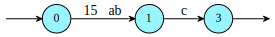

In [4]:
a = vcsn.context('[abcxy]* -> Q').expression('<2>(ab)<3>(c)<5/2>').standard(); a

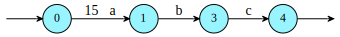

In [5]:
b = vcsn.context('[abcXY] -> Z').expression('<5>ab<3>c').standard(); b

In [6]:
a.is_equivalent(b)

True

### Boolean automata

Of course the different means to compute automata from rational expressions (`thompson`, `standard`, `derived_term`...) result in different, but equivalent, automata.

In [7]:
r = Bexp('[abc]*')
r

(a+b+c)*

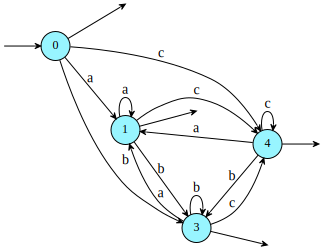

In [8]:
std = r.standard()
std

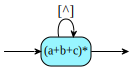

In [9]:
dt = r.derived_term()
dt

In [10]:
std.is_equivalent(dt)

True

Labelsets need not to be free.  For instance, one can compare the Thompson automaton (which features spontaneous transitions) with the standard automaton:

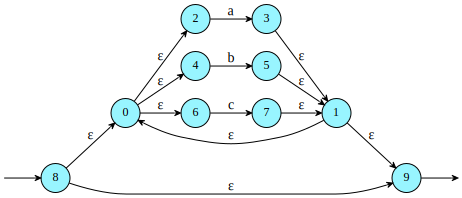

In [11]:
th = r.thompson()
th

In [12]:
th.is_equivalent(std)

True

Of course useless states "do not count" in checking equivalence.

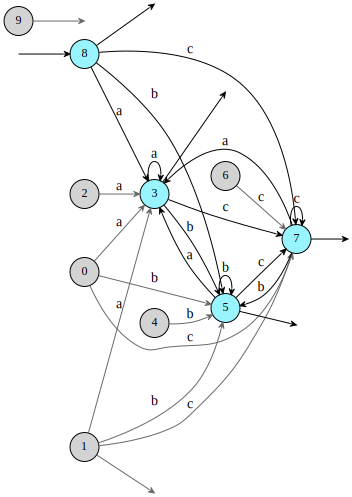

In [13]:
th.proper(prune = False)

In [14]:
th.proper(prune = False).is_equivalent(std)

True

### Weighted automata
In the case of weighted automata, the algorithms checks whether $(a_1 + -1 \times a_2).\mathtt{reduce}().\mathtt{is\_empty}()$, so the preconditions of `automaton.reduce` apply.

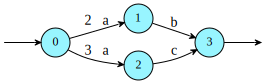

In [15]:
a = Zexp('<2>ab+<3>ac').automaton()
a

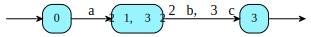

In [16]:
d = a.determinize()
d

In [17]:
d.is_equivalent(a)

True

In particular, beware that for numerical inaccuracy (with $\mathbb{R}$) or overflows (with $\mathbb{Z}$ or $\mathbb{Q}$) may result in incorrect results.  Using $\mathbb{Q}_\text{mp}$ is safe.